In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ev-motor/Car.JPG
/kaggle/input/ev-motor/measures_v2.csv
/kaggle/input/ev-motor/EV1.jfif


<div style="color:white;background-color:#5642C5;padding:3%;border-radius:110px 110px;font-size:2.5em;text-align:center">Electrical vehicle motor temperature rise prediction</div>

![](https://peakbusters.ca/wp-content/uploads/2014/07/Electric-Car.jpg)

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:Pink;
           font-size:33px;
           font-family:Nexa;
           letter-spacing:0.5px">
        <p style="padding: 15px;
              color:white;">
            <b>Introduction</b>
        </p>

The aim of this project is to predict the **permanent magnet temperature**  of a permanent magnet synchronous motor (PMSM) using simple linear regression models. The PMSM represents a German OEM's prototype model and the variables provided have been collected on a test bench. As suggested in the explanatory notes of the dataset, sensor measuring all the different temperatures of the motor and the "torque" are not reliable nor economically feasible in commercial applications. A sufficiently accurate prediction model would therefore eliminate the need for sensor measurements to determine the permanent magnet temperature. Other methods have been used in Engineering to predict the temperature although classic thermal modelling requires expertise in Thermodynamics. 
Temperature control of the elements of the motor are important as high temperatures in the permanent magnet could demagnetize it damaging the motor.

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:Pink;
           font-size:33px;
           font-family:Nexa;
           letter-spacing:0.5px">
        <p style="padding: 15px;
              color:white;">
            <b>Data Description </b>
        </p>

The data has been downloaded from a dataset in Kaggle provided by Paderborn University (Germany).

https://www.kaggle.com/wkirgsn/electric-motor-temperature

The data set consists of multiple measurement sessions, which can be distinguished from each other by column "profile_id". All recordings are sampled at 2 Hz.

Columns: 

- ambient  :    Ambient temperature as measured by a thermal sensor located closely to the stator.      
- coolant  :    Coolant temperature. The motor is water cooled. Measurement is taken at outflow.     
- u_d      :    Voltage d-component 
- u_q      :    Voltage q-component
- motor_speed : Motor speed    
- torque    :   Torque induced by current  
- i_d       :   Current d-component 
- i_q       :   Current q-component     
- pm        :   Permanent Magnet surface temperature representing the rotor temperature. This was measured with an infrared
- stator_yoke  : Stator yoke temperature measured with a thermal sensor.
- stator_winding : Stator tooth temperature measured with a thermal sensor. 
- profile_id :  Each measurement session has a unique ID.

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import rgb2hex
%matplotlib inline
import seaborn

import warnings
warnings.filterwarnings('ignore')

In [ ]:
filepath = "/Users/surendra/gen-ai-jlr/measures_v2.csv"
df = pd.read_csv(filepath)
df.head()

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
0,-0.450682,18.805172,19.086670,-0.350055,18.293219,0.002866,0.004419,0.000328,24.554214,18.316547,19.850691,0.187101,17
1,-0.325737,18.818571,19.092390,-0.305803,18.294807,0.000257,0.000606,-0.000785,24.538078,18.314955,19.850672,0.245417,17
2,-0.440864,18.828770,19.089380,-0.372503,18.294094,0.002355,0.001290,0.000386,24.544693,18.326307,19.850657,0.176615,17
3,-0.327026,18.835567,19.083031,-0.316199,18.292542,0.006105,0.000026,0.002046,24.554018,18.330833,19.850647,0.238303,17
4,-0.471150,18.857033,19.082525,-0.332272,18.291428,0.003133,-0.064317,0.037184,24.565397,18.326662,19.850639,0.208197,17


In [4]:
df.dtypes

u_q               float64
coolant           float64
stator_winding    float64
u_d               float64
stator_tooth      float64
motor_speed       float64
i_d               float64
i_q               float64
pm                float64
stator_yoke       float64
ambient           float64
torque            float64
profile_id          int64
dtype: object

In [5]:
print(f'\033[94m')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330816 entries, 0 to 1330815
Data columns (total 13 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   u_q             1330816 non-null  float64
 1   coolant         1330816 non-null  float64
 2   stator_winding  1330816 non-null  float64
 3   u_d             1330816 non-null  float64
 4   stator_tooth    1330816 non-null  float64
 5   motor_speed     1330816 non-null  float64
 6   i_d             1330816 non-null  float64
 7   i_q             1330816 non-null  float64
 8   pm              1330816 non-null  float64
 9   stator_yoke     1330816 non-null  float64
 10  ambient         1330816 non-null  float64
 11  torque          1330816 non-null  float64
 12  profile_id      1330816 non-null  int64  
dtypes: float64(12), int64(1)
memory usage: 132.0 MB


In [6]:
df = df[[
    'profile_id', 'u_d', 'u_q', 'i_d', 'i_q', 'motor_speed', 'torque',
    'stator_winding', 'stator_tooth', 'stator_yoke', 'ambient', 'coolant', 'pm'
]]

In [7]:
df.head().style.background_gradient(cmap='cool')

,profile_id,u_d,u_q,i_d,i_q,motor_speed,torque,stator_winding,stator_tooth,stator_yoke,ambient,coolant,pm
0,17,-0.350055,-0.450682,0.004419,0.000328,0.002866,0.187101,19.086670,18.293219,18.316547,19.850691,18.805172,24.554214
1,17,-0.305803,-0.325737,0.000606,-0.000785,0.000257,0.245417,19.092390,18.294807,18.314955,19.850672,18.818571,24.538078
2,17,-0.372503,-0.440864,0.001290,0.000386,0.002355,0.176615,19.089380,18.294094,18.326307,19.850657,18.828770,24.544693
3,17,-0.316199,-0.327026,0.000026,0.002046,0.006105,0.238303,19.083031,18.292542,18.330833,19.850647,18.835567,24.554018
4,17,-0.332272,-0.471150,-0.064317,0.037184,0.003133,0.208197,19.082525,18.291428,18.326662,19.850639,18.857033,24.565397


In [8]:
print(f'\033[95m')
print(df.shape)
print(df.size)


(1330816, 13)
17300608


In [9]:
df.isnull().sum()

profile_id        0
u_d               0
u_q               0
i_d               0
i_q               0
motor_speed       0
torque            0
stator_winding    0
stator_tooth      0
stator_yoke       0
ambient           0
coolant           0
pm                0
dtype: int64

In [10]:
df['profile_id'].nunique()

69

In [11]:
df['profile_id'].unique()

array([17,  5, 12, 32, 21,  2,  4,  7, 19,  3,  9, 23, 27, 26, 11,  6, 10,
       13, 31, 18, 30, 29,  8, 24, 20, 15, 14, 16, 36, 74, 75, 41, 68, 50,
       53, 49, 81, 80, 59, 54, 57, 70, 51, 55, 45, 69, 61, 76, 56, 64, 72,
       73, 62, 65, 63, 43, 47, 66, 42, 48, 67, 44, 79, 52, 60, 46, 58, 78,
       71])

In [12]:
df.describe().round(3)

,profile_id,u_d,u_q,i_d,i_q,motor_speed,torque,stator_winding,stator_tooth,stator_yoke,ambient,coolant,pm
count,1330816.000,1330816.000,1330816.000,1330816.000,1330816.000,1330816.000,1330816.000,1330816.000,1330816.000,1330816.000,1330816.000,1330816.000,1330816.000
mean,40.793,-25.134,54.279,-68.717,37.413,2202.081,31.106,66.343,56.879,48.188,24.565,36.230,58.507
std,25.045,63.092,44.173,64.933,92.182,1859.663,77.136,28.672,22.952,19.991,1.930,21.786,19.001
min,2.000,-131.530,-25.291,-278.004,-293.427,-275.549,-246.467,18.586,18.134,18.077,8.783,10.624,20.857
25%,17.000,-78.691,12.070,-115.406,1.096,317.111,-0.137,42.788,38.416,31.990,23.185,18.698,43.152
50%,43.000,-7.430,48.938,-51.094,15.774,1999.977,10.860,65.110,56.036,45.626,24.797,26.900,60.266
75%,65.000,1.470,90.034,-2.980,100.612,3760.639,91.597,88.141,75.587,61.461,26.217,49.857,72.008
max,81.000,131.470,133.037,0.052,301.708,6000.015,261.006,141.363,111.946,101.148,30.714,101.599,113.607


In [13]:
grouped_df_id = df.groupby(['profile_id'])

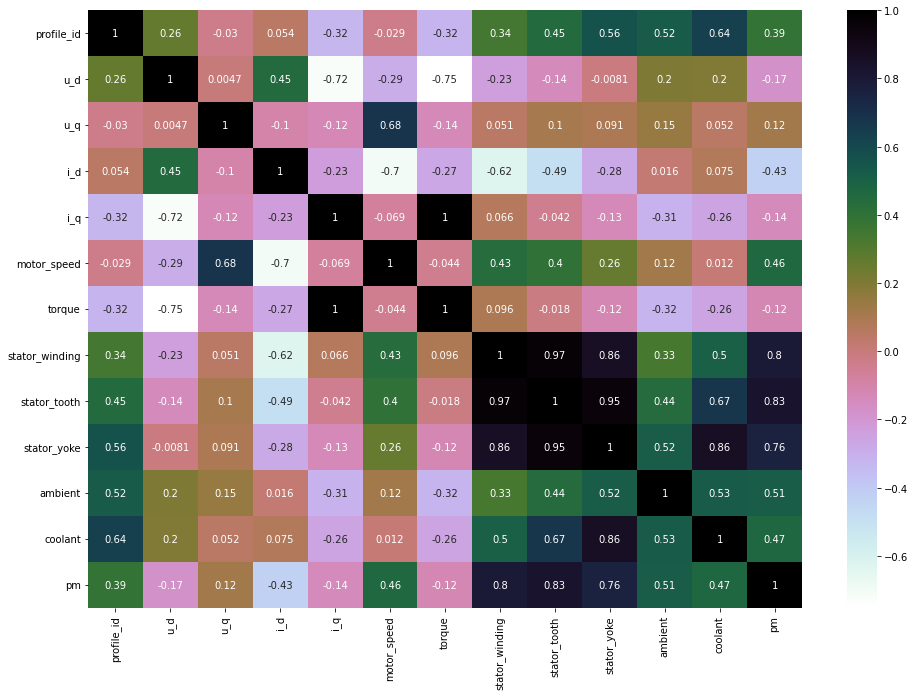

In [14]:
plt.figure(figsize=(16,11))
sns.heatmap(df.corr(),annot=True,cmap='cubehelix_r');

In [15]:
df['pm_range'] = pd.cut(x=df['pm'],bins=[1, 30, 60, 90, 120],labels=['Low', 'Average', 'High',"V_High"])
df.head(2)

,profile_id,u_d,u_q,i_d,i_q,motor_speed,torque,stator_winding,stator_tooth,stator_yoke,ambient,coolant,pm,pm_range
0,17,-0.350055,-0.450682,0.004419,0.000328,0.002866,0.187101,19.08667,18.293219,18.316547,19.850691,18.805172,24.554214,Low
1,17,-0.305803,-0.325737,0.000606,-0.000785,0.000257,0.245417,19.09239,18.294807,18.314955,19.850672,18.818571,24.538078,Low


In [16]:
df['pm_range'].value_counts()

High       611022
Average    563814
Low         94994
V_High      60986
Name: pm_range, dtype: int64

In [17]:
print(f'\033[92m')
print("Minimum ambient temp:",df['ambient'].round(2).min())
print(f'\033[94m')
print("Maximum ambient temp:",df['ambient'].round(2).max())


Minimum ambient temp: 8.78

Maximum ambient temp: 30.71


In [18]:
df.describe().round(2).T.sort_values(by='std' , ascending = False)\
                     .style.background_gradient(cmap='GnBu')\
                     .bar(subset=["max"], color='#BB0000')\
                     .bar(subset=["min",], color='green')\
                     .bar(subset=["mean",], color='Orange')\
                     .bar(subset=['std'], color='pink')\
                     .bar(subset=['50%'], color='magenta')

,count,mean,std,min,25%,50%,75%,max
motor_speed,1330816.000000,2202.080000,1859.660000,-275.550000,317.110000,1999.980000,3760.640000,6000.020000
i_q,1330816.000000,37.410000,92.180000,-293.430000,1.100000,15.770000,100.610000,301.710000
torque,1330816.000000,31.110000,77.140000,-246.470000,-0.140000,10.860000,91.600000,261.010000
i_d,1330816.000000,-68.720000,64.930000,-278.000000,-115.410000,-51.090000,-2.980000,0.050000
u_d,1330816.000000,-25.130000,63.090000,-131.530000,-78.690000,-7.430000,1.470000,131.470000
u_q,1330816.000000,54.280000,44.170000,-25.290000,12.070000,48.940000,90.030000,133.040000
stator_winding,1330816.000000,66.340000,28.670000,18.590000,42.790000,65.110000,88.140000,141.360000
profile_id,1330816.000000,40.790000,25.050000,2.000000,17.000000,43.000000,65.000000,81.000000
stator_tooth,1330816.000000,56.880000,22.950000,18.130000,38.420000,56.040000,75.590000,111.950000
coolant,1330816.000000,36.230000,21.790000,10.620000,18.700000,26.900000,49.860000,101.600000


<div style="color:white;background-color:#5642C5;padding:3%;border-radius:110px 110px;font-size:2.5em;text-align:center">EDA 📚</div>

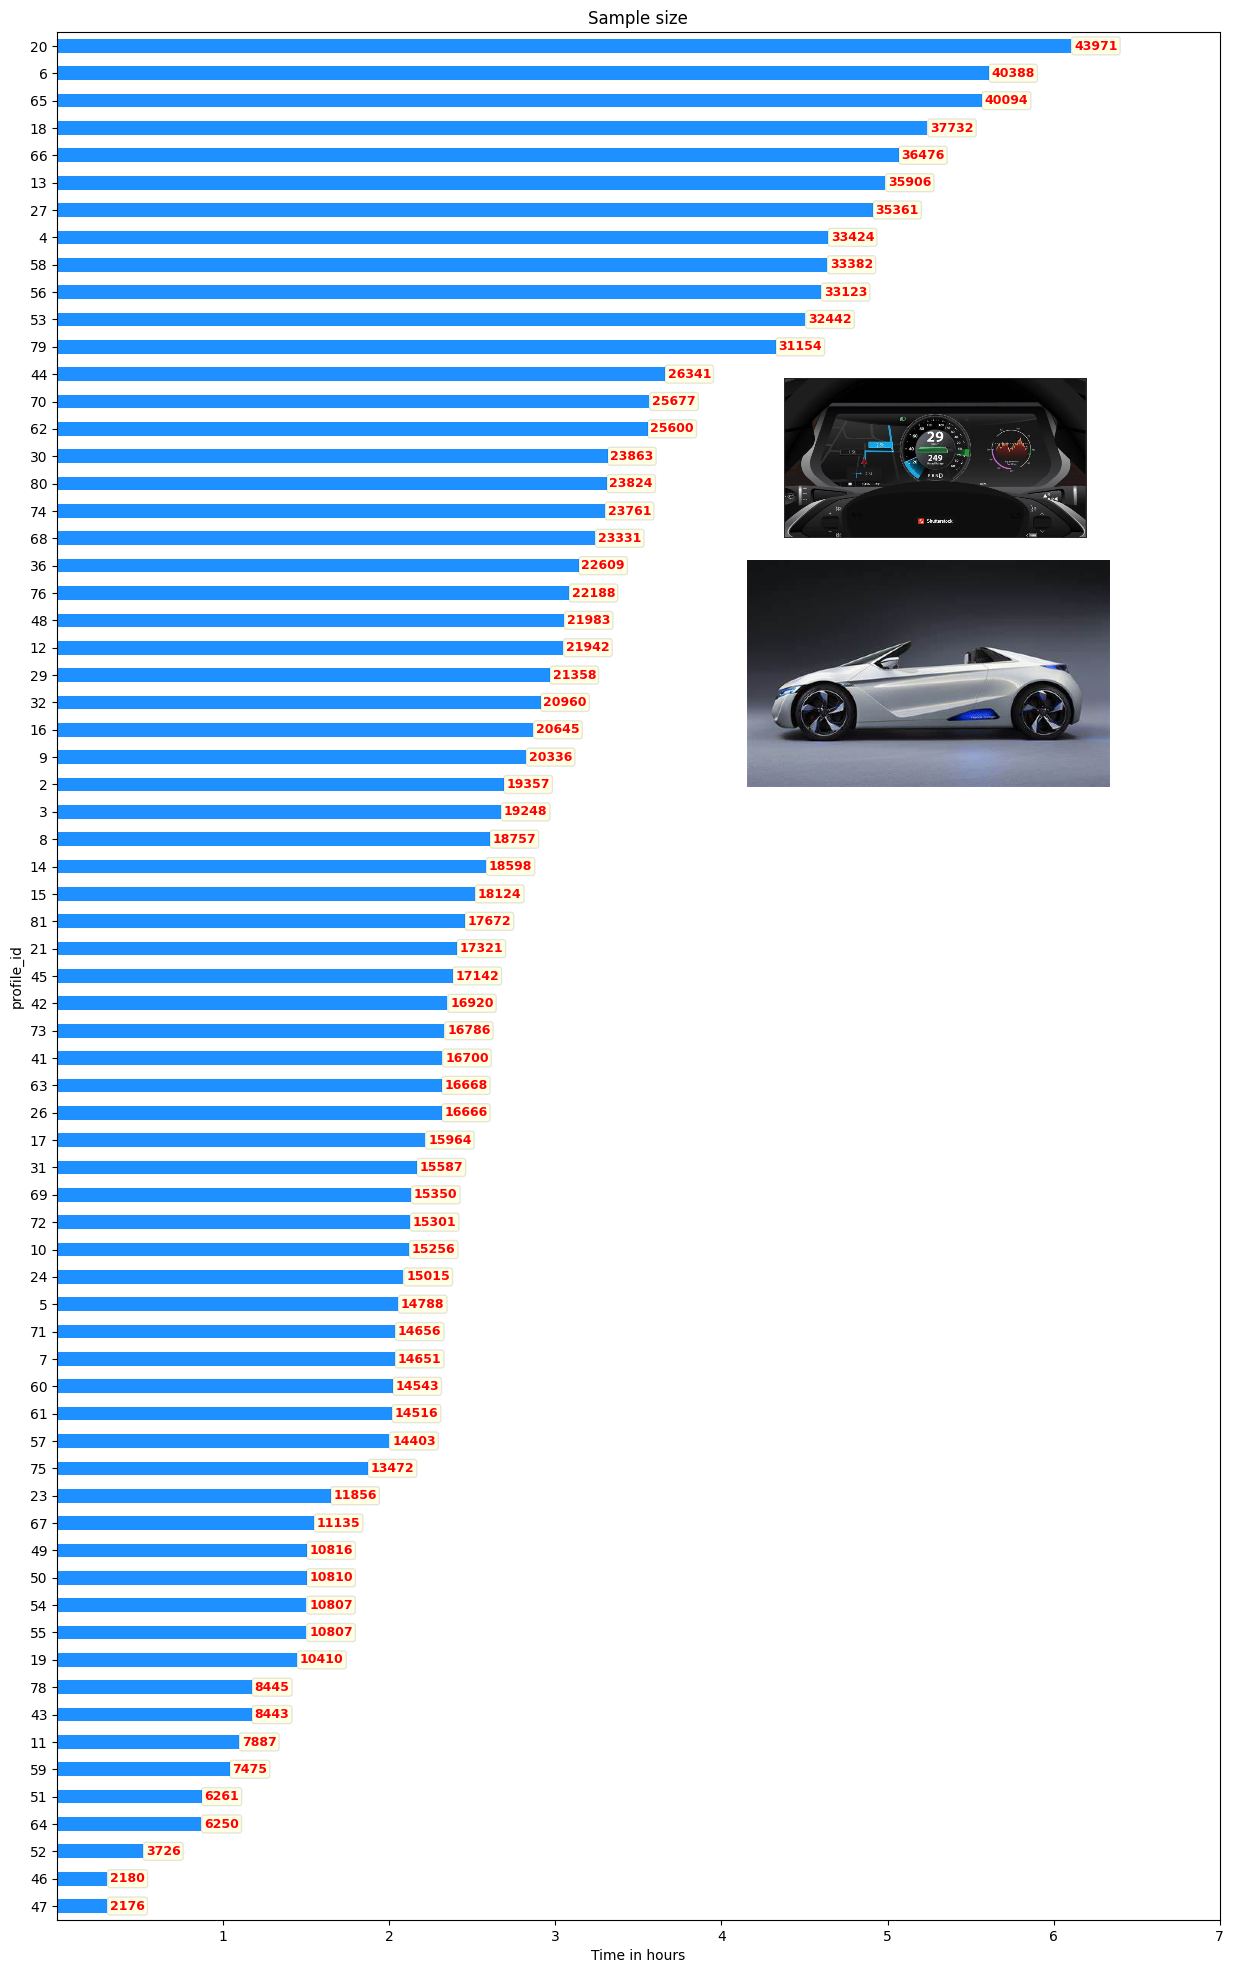

In [ ]:
# import matplotlib as mlb
import matplotlib.image as mpimg
from matplotlib.offsetbox import AnnotationBbox, OffsetImage


p = fig = plt.figure(figsize=(15, 25),dpi=100)
p_counts = df.groupby('profile_id')['pm'].agg('count').sort_values()
p = p_counts.plot.barh(title='Sample size',color = "dodgerblue")
_ = p.set_xticks(2*3600*np.arange(1, 8)) # 2Hz sample rate
_ = p.set_xticklabels(list(range(1, 8)))
_ = p.set_xlabel('Time in hours')


for container in p.containers:
    p.bar_label(container,label_type = 'edge',padding = 2,size = 9,color = "Red",weight = 'bold',rotation = 0,
    bbox={"boxstyle": "round", "pad": 0.2, "facecolor": "yellow", "alpha": .1})


#Patches
for a in p.patches:
    value = f'{a.get_width():.0f}'
    x = a.get_x() + a.get_width() + .06
    y = a.get_y() + a.get_height() / 1.8

#image
path = mpimg.imread('../input/ev-motor/Car.JPG')
imagebox = OffsetImage(path , zoom=.25)
xy = (.7, .5)
ab = AnnotationBbox(imagebox, xy, pad=1, xybox=(100, 50),box_alignment=(-2.4, 0),frameon=False)
p.add_artist(ab);

path1 = mpimg.imread('../input/ev-motor/EV1.jfif')
imagebox = OffsetImage(path1 , zoom=.55)
xy = (.7, .5)
car = AnnotationBbox(imagebox, xy, pad=1, xybox=(100, 50),box_alignment=(-1.9, 1.1),frameon=False)
p.add_artist(car);

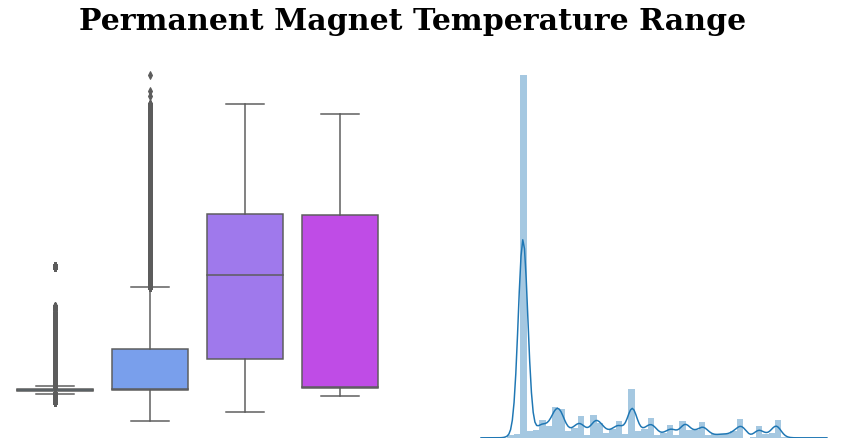

In [20]:
plt.rcParams['font.family'] = ['serif']
background_color = "#ffffff"
fig = plt.figure(figsize=(15,7), facecolor=background_color)
fig.suptitle('Permanent Magnet Temperature Range', fontsize=30, fontweight='bold')

ax1 = fig.add_subplot(121)
ax1 = sns.boxplot(x=df["pm_range"], y=df["coolant"],palette="cool")
plt.axis('off')

ax2 = fig.add_subplot(122)
x=df["coolant"]
ax2 = sns.distplot(x)
plt.axis('off')
plt.show();

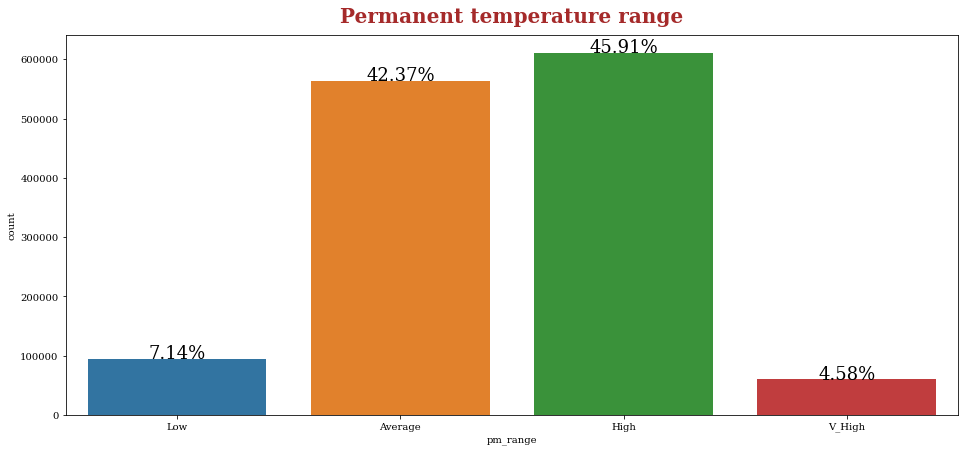

In [ ]:
#viz parameters
plt.rcParams['figure.figsize'] = (16,7)

s = sns.countplot(x = 'pm_range',data = df)
sizes=[]
for p in s.patches:
    height = p.get_height()
    sizes.append(height)
    s.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/len(df)*100),
            ha="center", fontsize=18)
plt.title("Permanent temperature range", fontsize=20, fontweight='bold',color='Brown',pad=12);

In [22]:
print(f'\033[92m')
print("Minimum ambient temp:",df['pm'].round(2).min())
print(f'\033[94m')
print("Maximum ambient temp:",df['pm'].round(2).max())


Minimum ambient temp: 20.86

Maximum ambient temp: 113.61


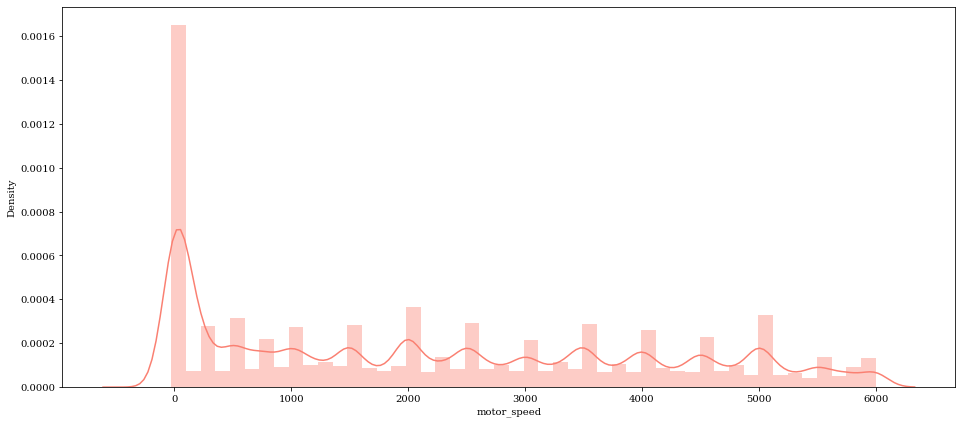

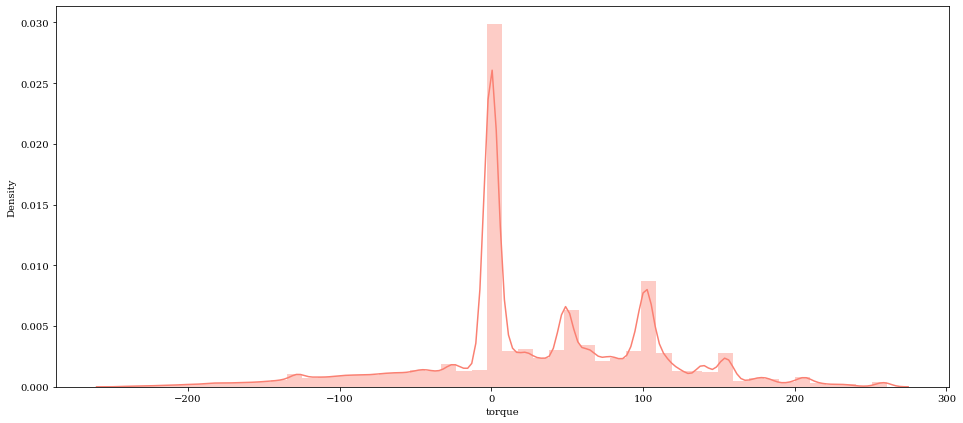

In [23]:
data_feature = df[["motor_speed" , "torque"]]

for feature in data_feature:
    p = sns.distplot(a = df[feature],color='salmon')
    plt.show()

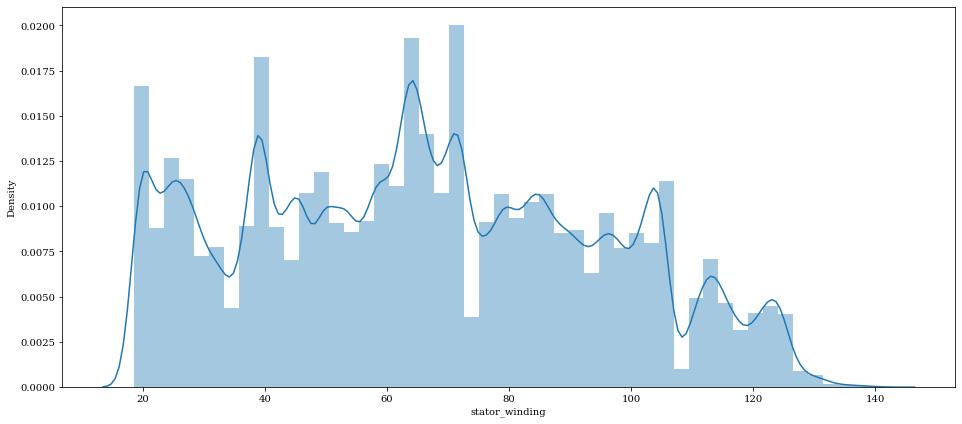

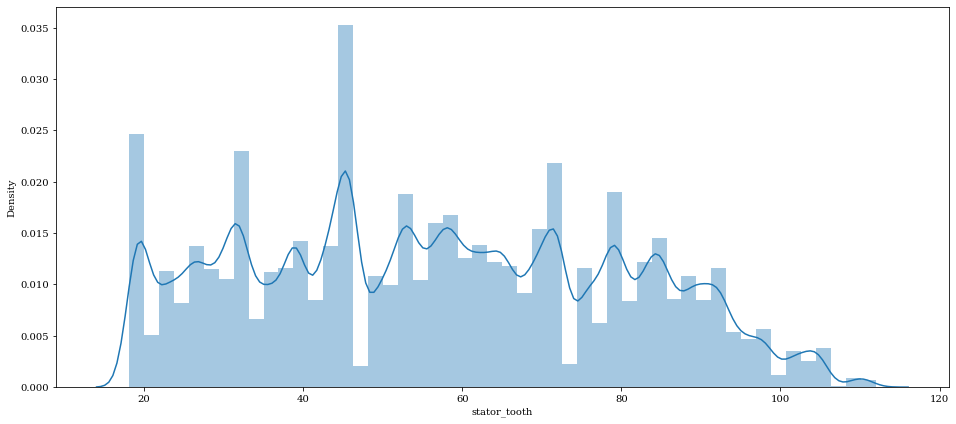

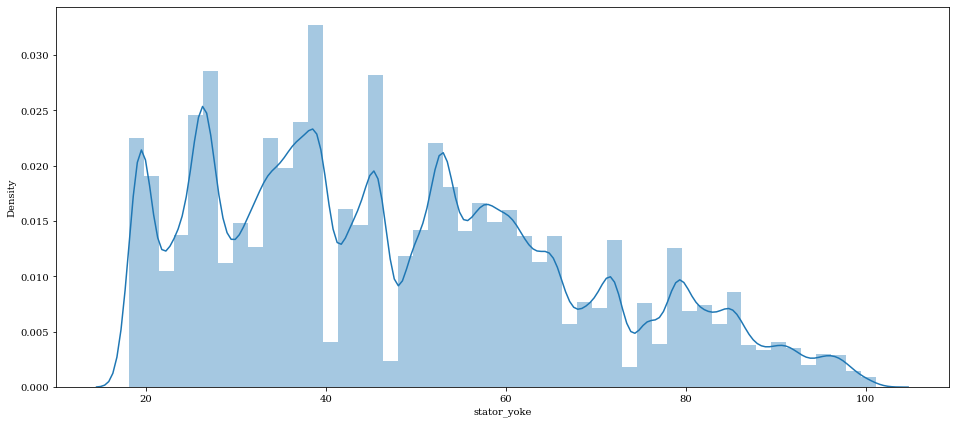

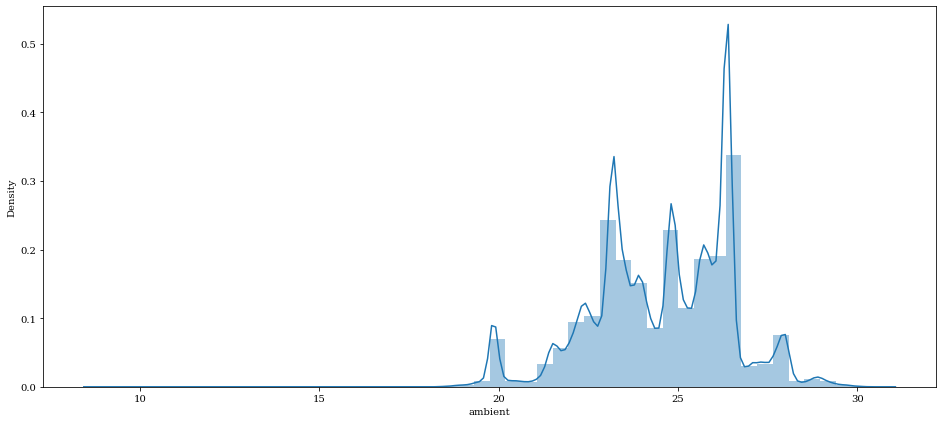

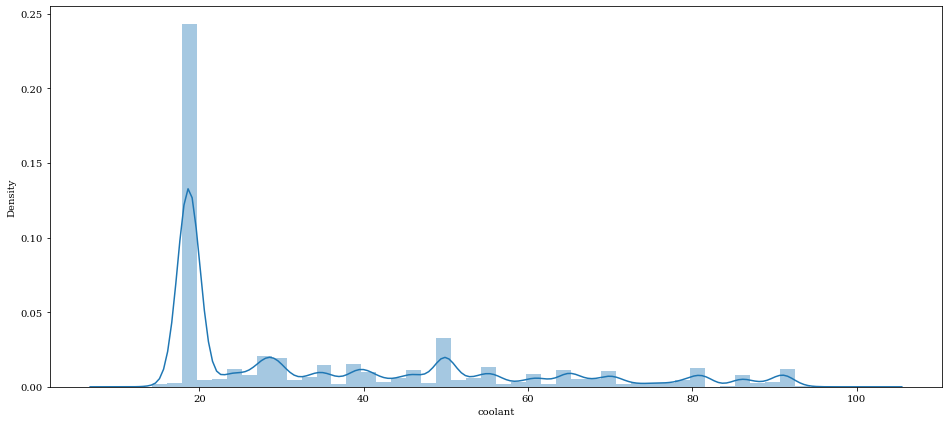

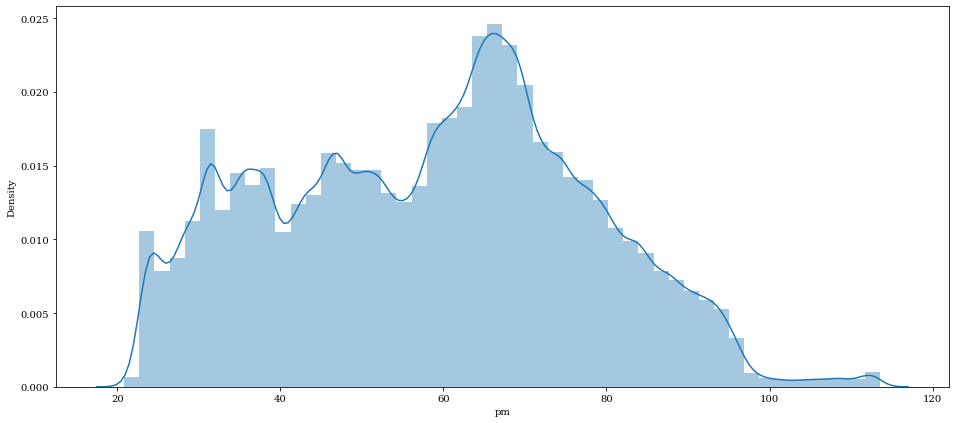

In [24]:
data_feature = df[['stator_winding', 'stator_tooth', 'stator_yoke', 'ambient', 'coolant','pm']]

for feature in data_feature:
    p = sns.distplot(a = df[feature],)
    plt.show()

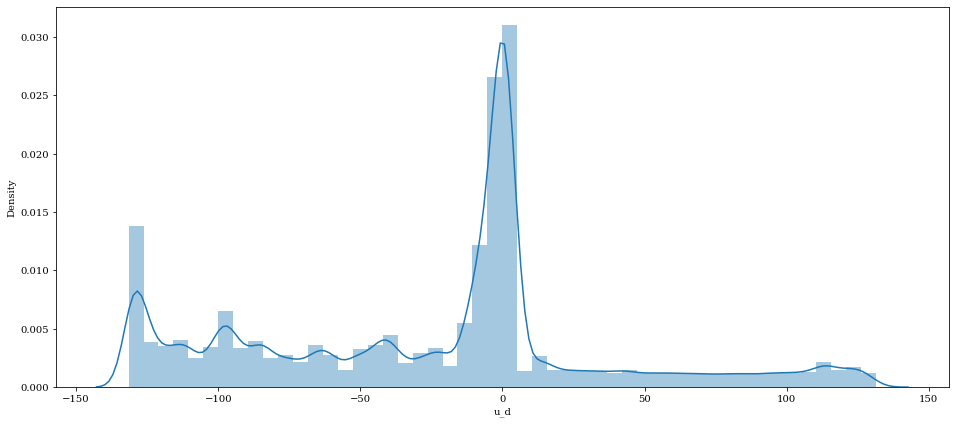

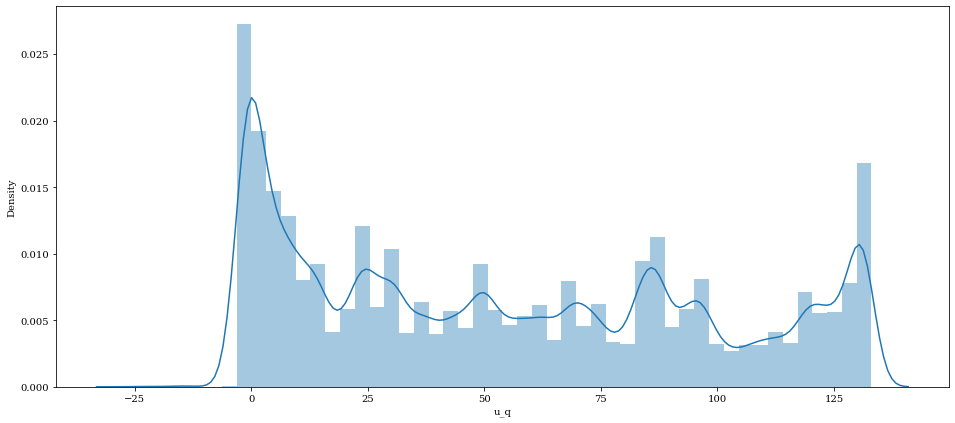

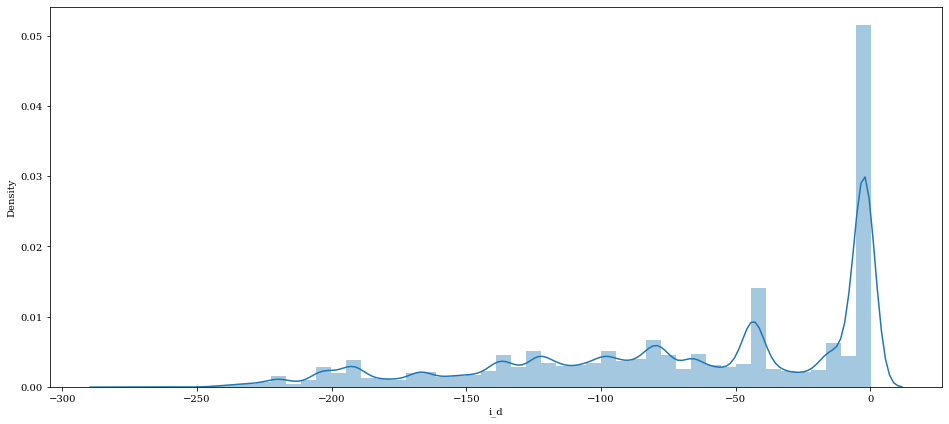

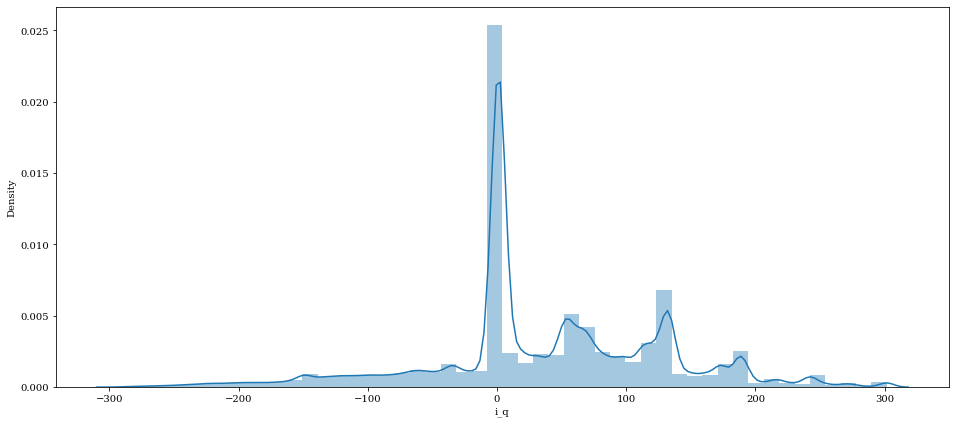

In [25]:
data_feature = df[['u_d', 'u_q', 'i_d', 'i_q']]

for feature in data_feature:
    p = sns.distplot(a = df[feature])
    plt.show()

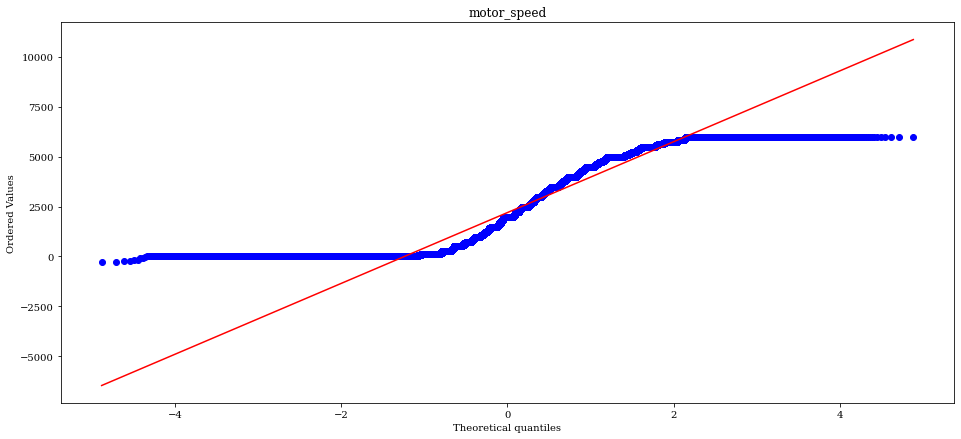

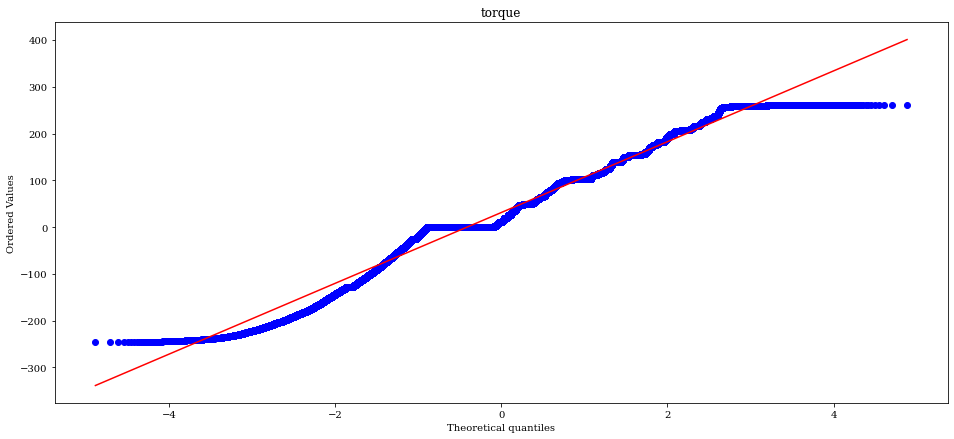

In [26]:
from scipy import stats
for feature in df[["motor_speed" , "torque"]]:
    stats.probplot(df[feature], plot = plt)
    plt.title(feature)
    plt.show()

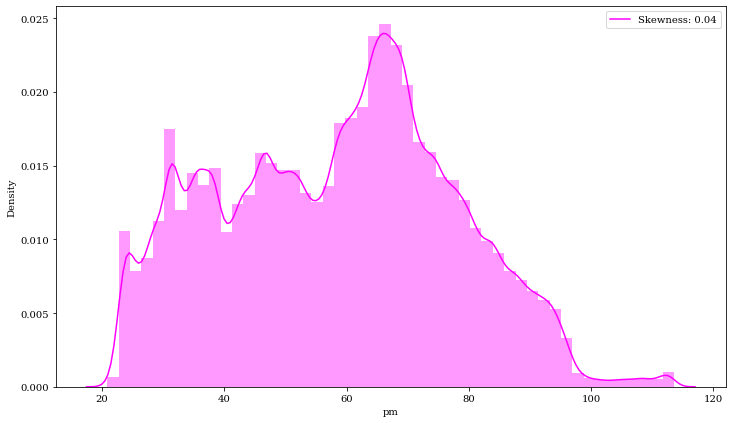

In [27]:
# Plot the distplot of target

plt.figure(figsize=(12,7))
bar = sns.distplot(df["pm"],color='magenta')
bar.legend(["Skewness: {:.2f}".format(df['pm'].skew())])
plt.show()

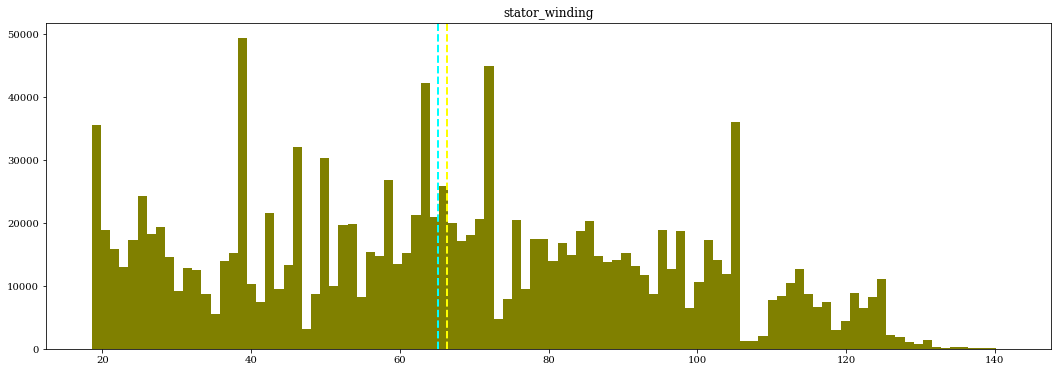

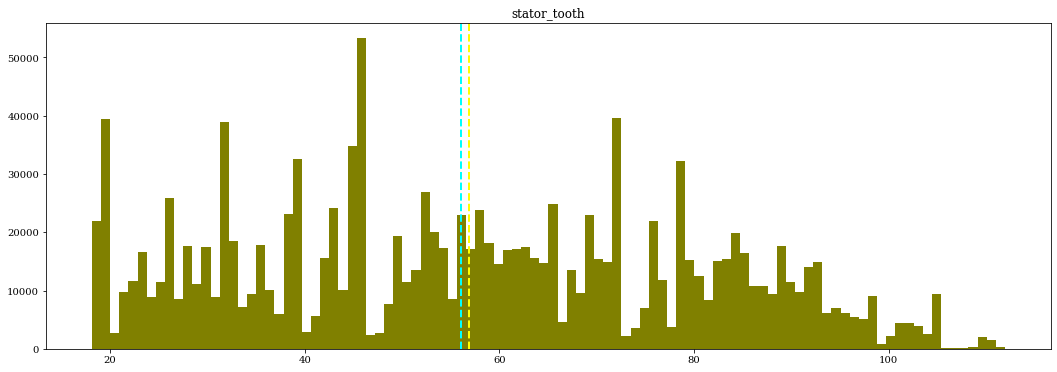

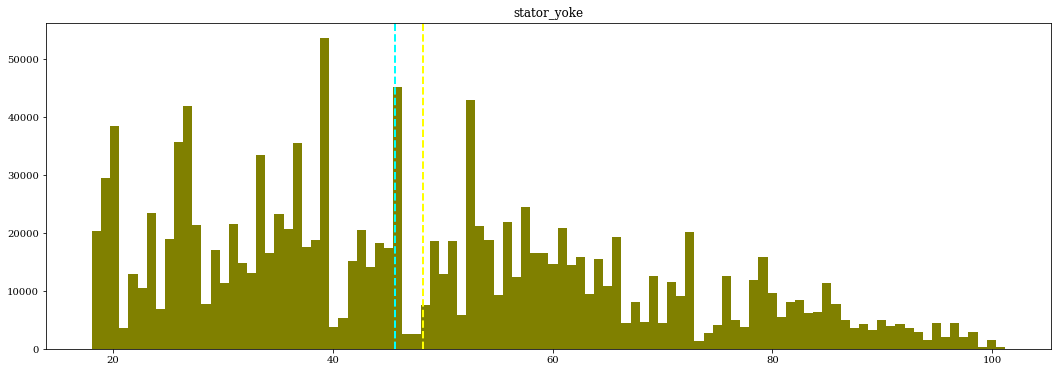

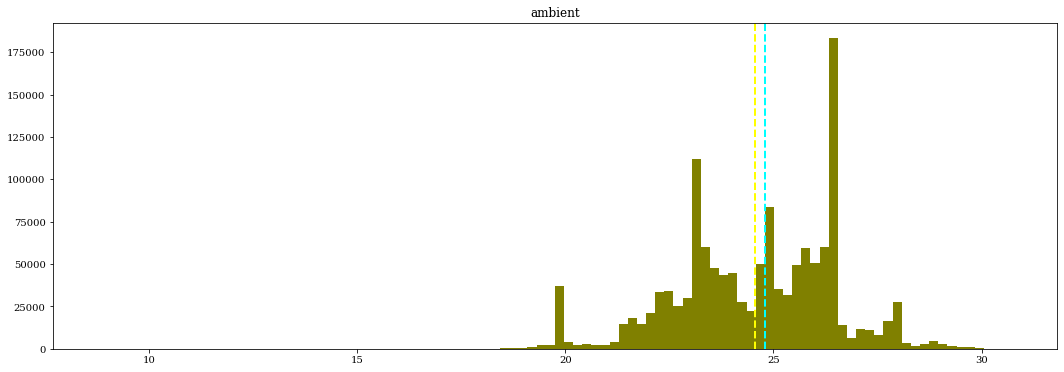

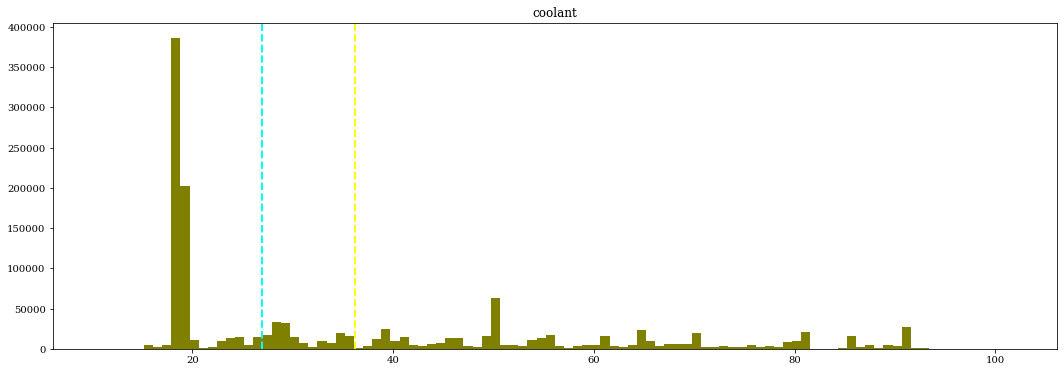

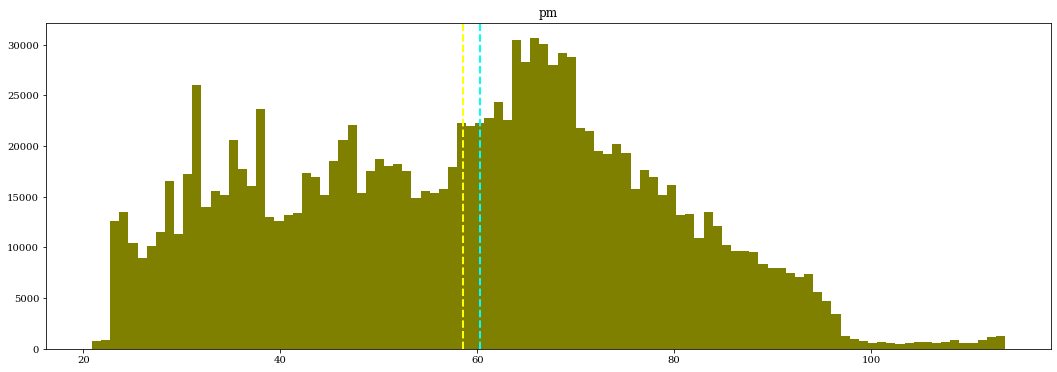

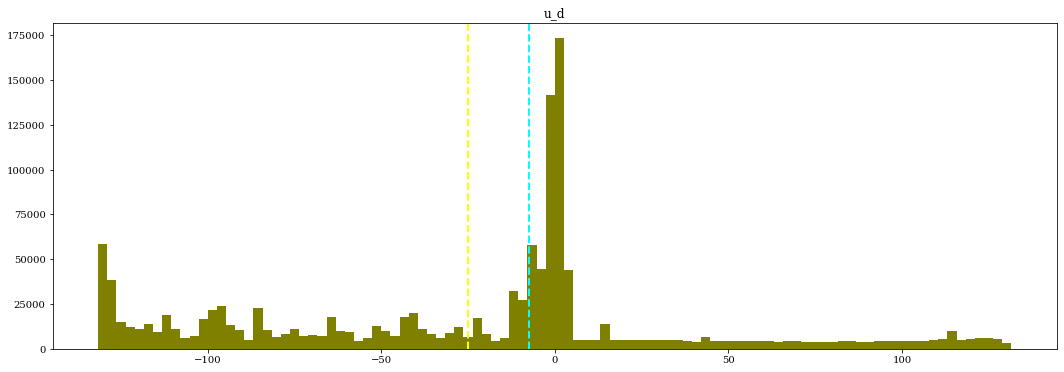

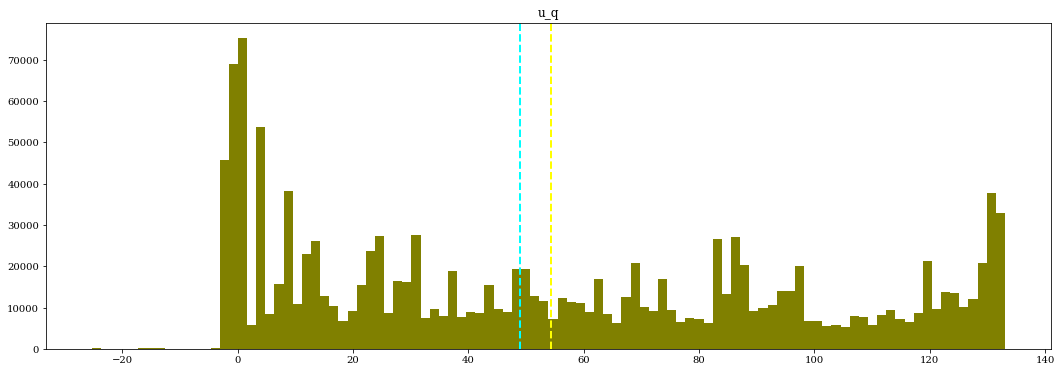

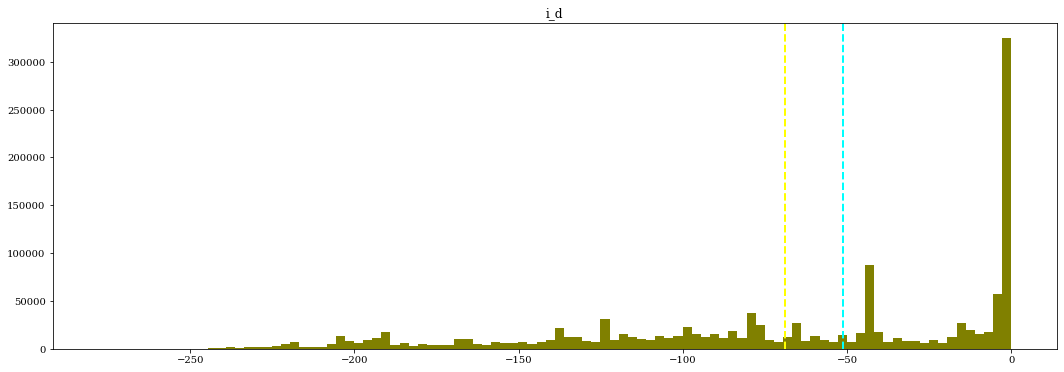

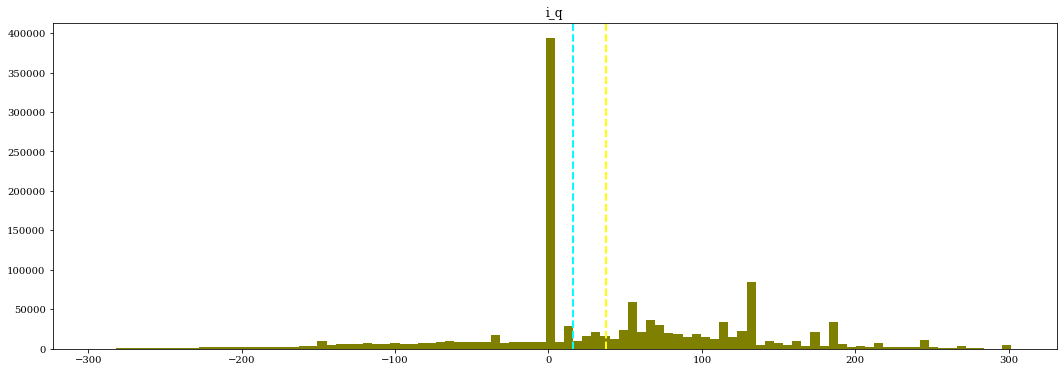

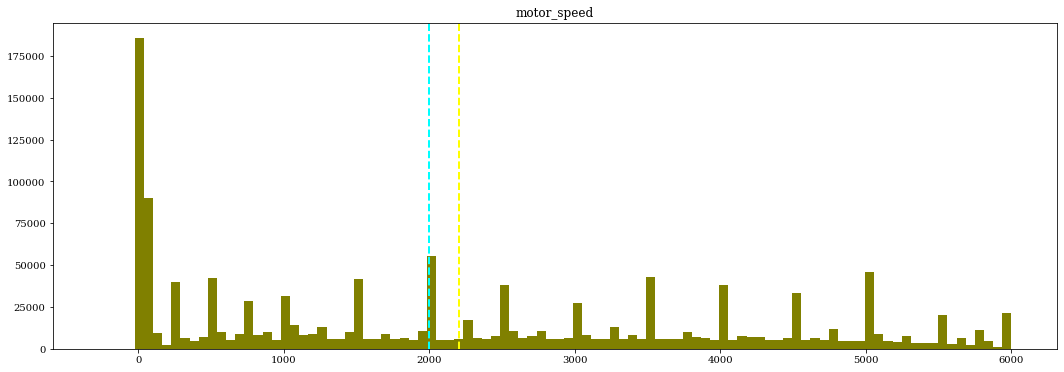

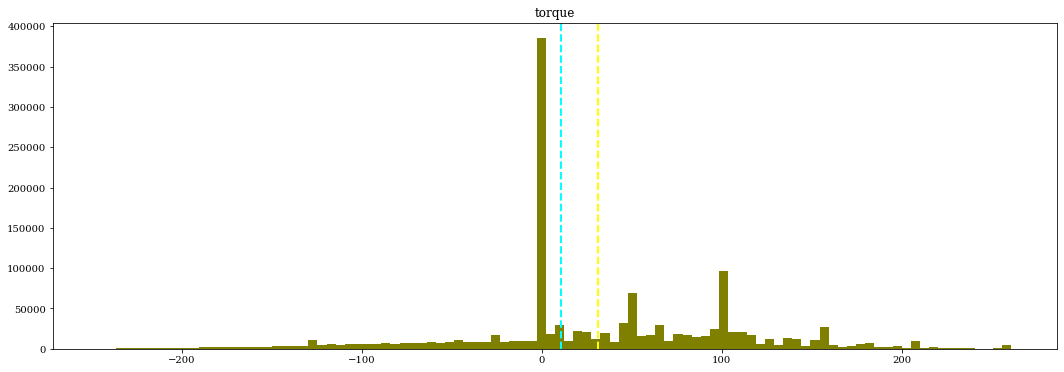

In [ ]:
for col in df[['stator_winding', 'stator_tooth', 'stator_yoke', 'ambient', 'coolant','pm','u_d', 'u_q', 'i_d', 'i_q',"motor_speed" , "torque"]]:
    fig = plt.figure(figsize=(18, 6))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=100, ax = ax,grid=False,color='olive')
    ax.axvline(feature.mean(), color='yellow', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
    ax.set_title(col)
plt.show()

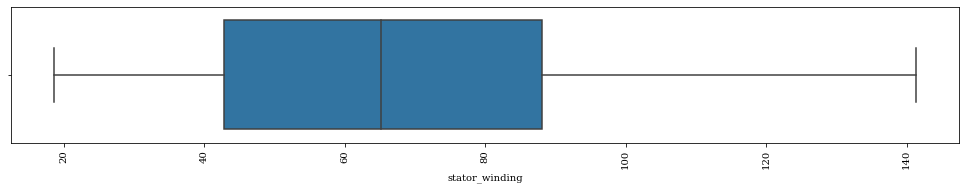

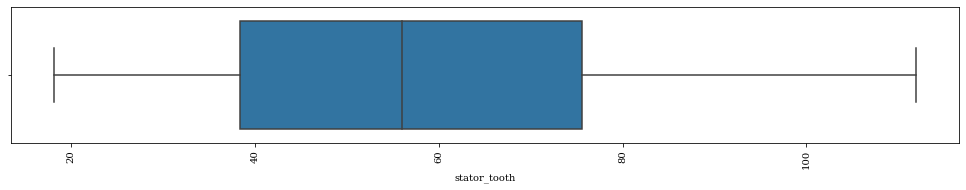

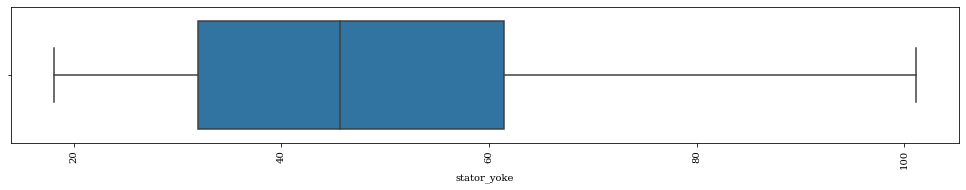

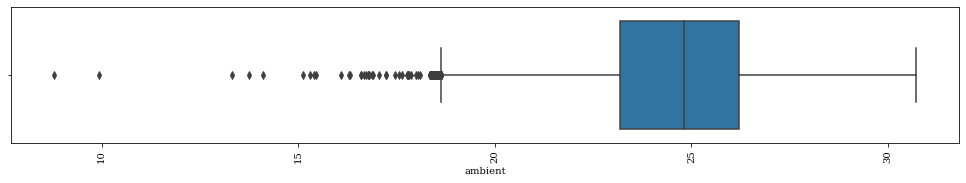

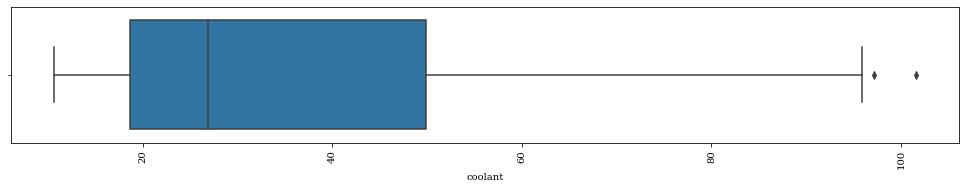

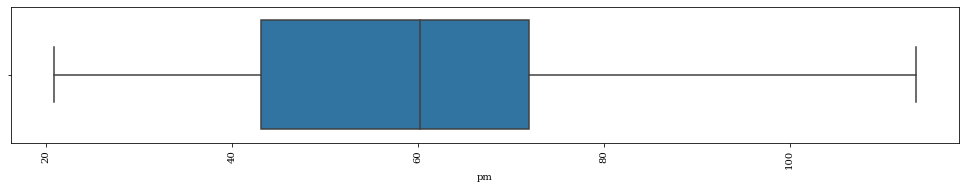

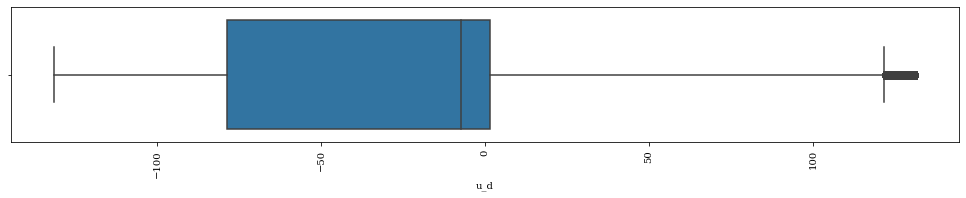

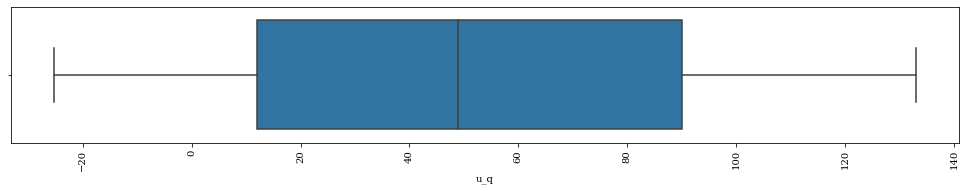

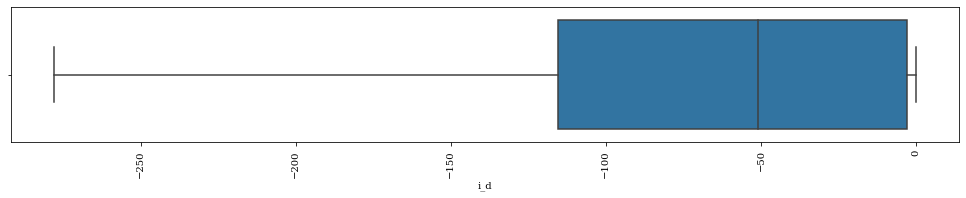

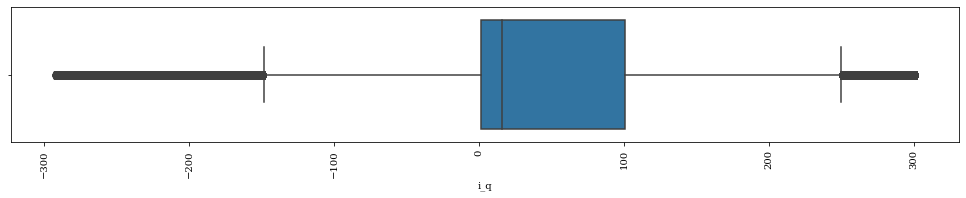

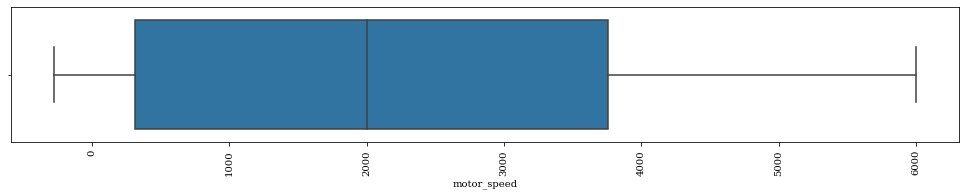

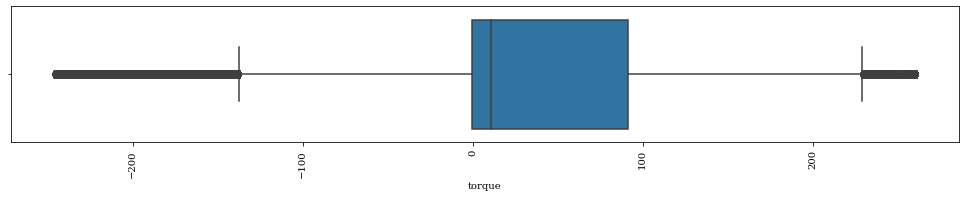

In [29]:
data = df[['stator_winding', 'stator_tooth', 'stator_yoke', 'ambient', 'coolant','pm','u_d', 'u_q', 'i_d', 'i_q',"motor_speed" , "torque"]]
for i in data.columns:
    plt.figure(figsize=(17,2.5))
    sns.boxplot(data[i])
    plt.xticks(rotation=90)
    plt.show()

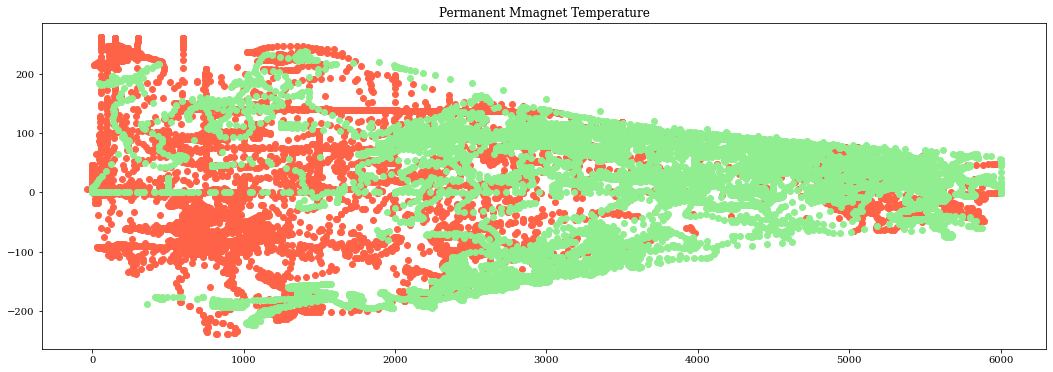

In [ ]:
# Creating a figure
plt.figure(figsize=(18,6))

#plotting the values for people who have heart disease
plt.scatter(df.motor_speed[df.pm_range=="Low"],
            df.torque[df.pm_range=="Low"],
            c="tomato")

#plotting the values for people who doesn't have heart disease
plt.scatter(df.motor_speed[df.pm_range=="V_High"],
            df.torque[df.pm_range=="V_High"],
            c="lightgreen")

# Addind info
plt.title("Permanent Mmagnet Temperature");

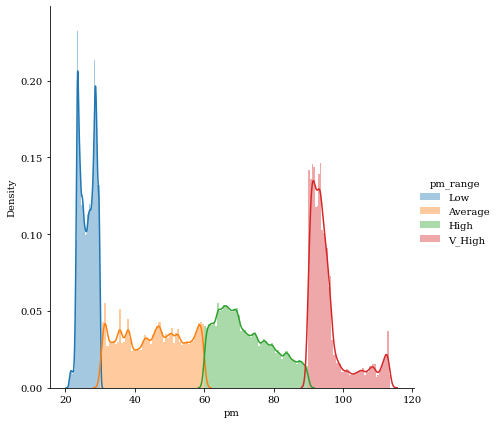

In [31]:
sns.FacetGrid(df, hue='pm_range', height=6).map(sns.distplot, 'pm').add_legend()
plt.show()

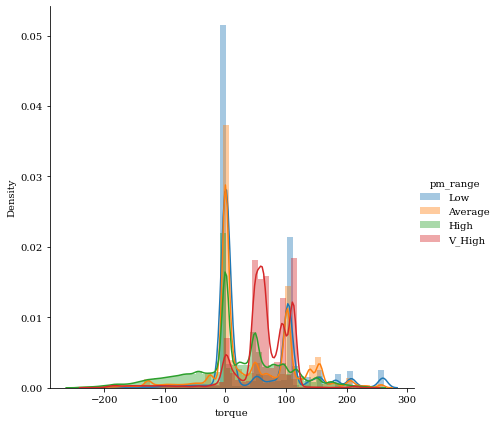

In [32]:
sns.FacetGrid(df, hue='pm_range', height=6).map(sns.distplot, 'torque').add_legend()
plt.show()

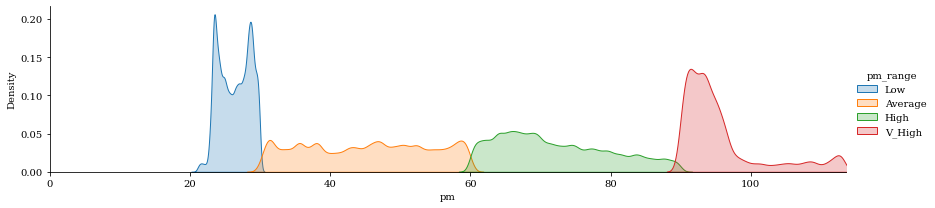

In [33]:
fig = sns.FacetGrid(df, hue="pm_range", aspect=4)
fig.map(sns.kdeplot, 'pm', shade=True)
oldest = df['pm'].max()
fig.set(xlim=(0, oldest))
fig.add_legend()
plt.show()

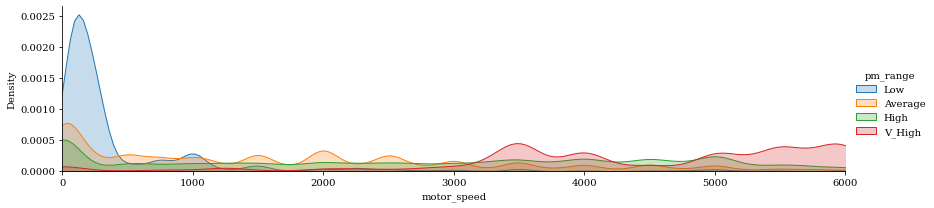

In [34]:
fig = sns.FacetGrid(df, hue="pm_range", aspect=4)
fig.map(sns.kdeplot, 'motor_speed', shade=True)
oldest = df['motor_speed'].max()
fig.set(xlim=(0, oldest))
fig.add_legend()
plt.show()

In [35]:
import category_encoders as ce
encoder = ce.OrdinalEncoder(cols=['pm_range'])
df = encoder.fit_transform(df)
df.head()

,profile_id,u_d,u_q,i_d,i_q,motor_speed,torque,stator_winding,stator_tooth,stator_yoke,ambient,coolant,pm,pm_range
0,17,-0.350055,-0.450682,0.004419,0.000328,0.002866,0.187101,19.086670,18.293219,18.316547,19.850691,18.805172,24.554214,1
1,17,-0.305803,-0.325737,0.000606,-0.000785,0.000257,0.245417,19.092390,18.294807,18.314955,19.850672,18.818571,24.538078,1
2,17,-0.372503,-0.440864,0.001290,0.000386,0.002355,0.176615,19.089380,18.294094,18.326307,19.850657,18.828770,24.544693,1
3,17,-0.316199,-0.327026,0.000026,0.002046,0.006105,0.238303,19.083031,18.292542,18.330833,19.850647,18.835567,24.554018,1
4,17,-0.332272,-0.471150,-0.064317,0.037184,0.003133,0.208197,19.082525,18.291428,18.326662,19.850639,18.857033,24.565397,1


In [36]:
X = df.drop('pm',axis=1)
y = df['pm']

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

<div style="color:white;background-color:#5642C5;padding:3%;border-radius:110px 110px;font-size:2.5em;text-align:center">Model Building 📚</div>

In [38]:
from sklearn.dummy import DummyRegressor

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import PoissonRegressor
from sklearn.linear_model import GammaRegressor
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import LassoLarsIC
from sklearn.linear_model import LassoLarsCV
from sklearn.linear_model import Lars
from sklearn.linear_model import LarsCV
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import TweedieRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import OrthogonalMatchingPursuitCV
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.linear_model import LassoLars

from sklearn.gaussian_process import GaussianProcessRegressor

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import ExtraTreeRegressor

from sklearn.svm import SVR
from sklearn.svm import NuSVR
from sklearn.svm import LinearSVR

from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import HistGradientBoostingRegressor

from sklearn.neighbors import KNeighborsRegressor

from sklearn.neural_network import MLPRegressor

import xgboost as xgb


from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,accuracy_score

In [39]:
models = [
    LinearRegression(),
    HuberRegressor(),
    #PoissonRegressor(),
    GammaRegressor(),
    RidgeCV(),
    BayesianRidge(),
    Ridge(),
    ElasticNetCV(),
    LassoCV(),
    LassoLarsIC(criterion='bic', normalize=False),
    LassoLarsCV(),
    Lars(n_nonzero_coefs=1, normalize=False),
    LarsCV(),
    #SGDRegressor(),
    TweedieRegressor(),
    ElasticNet(),
    Lasso(alpha=0.1),
    RANSACRegressor(),
    OrthogonalMatchingPursuitCV(),
    PassiveAggressiveRegressor(),
    OrthogonalMatchingPursuit(),
    #GaussianProcessRegressor(),
    DecisionTreeRegressor(),
    ExtraTreeRegressor(),
    #SVR(),
    #NuSVR(),
    LinearSVR(),
    BaggingRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    ExtraTreesRegressor(),
    AdaBoostRegressor(),
    HistGradientBoostingRegressor(),
    KNeighborsRegressor(),
    MLPRegressor(),
    xgb.XGBRegressor(verbosity=0),
    #DummyRegressor()
]

In [ ]:
def model_selection():
    for model in models:

        model.fit(X_train,y_train)
        predict = model.predict(X_test)

        R2_score = r2_score(predict,y_test).round(3)
        mae = mean_absolute_error(predict,y_test).round(3)
        mse = mean_squared_error(predict,y_test).round(3)
        rmse= np.sqrt(mean_squared_error(predict,y_test))

        print(f"\033[34m")
        print(model,'\n')
        print(f"\033[31m")
        print("R2_score                ", "=" ,R2_score*100,"%")
        print("Mean Absulute Error     ", "=" , mae)
        print("Mean Squared Error      ", "=" , mse)
        print("Root Mean Squared Error ", "=" , rmse.round(2))

        print(f"\033[32m")
        print("==="*15)

In [41]:
model_selection()


LinearRegression() 


R2_score                 = 90.60000000000001 %
Mean Absulute Error      = 4.331
Mean Squared Error       = 30.995
Root Mean Squared Error  = 5.57


HuberRegressor() 


R2_score                 = 76.8 %
Mean Absulute Error      = 6.095
Mean Squared Error       = 71.673
Root Mean Squared Error  = 8.47


GammaRegressor() 


R2_score                 = -1.461049876782096e+31 %
Mean Absulute Error      = 15.925
Mean Squared Error       = 361.444
Root Mean Squared Error  = 19.01


RidgeCV(alphas=array([ 0.1,  1. , 10. ])) 


R2_score                 = 90.7 %
Mean Absulute Error      = 4.333
Mean Squared Error       = 31.02
Root Mean Squared Error  = 5.57


BayesianRidge() 


R2_score                 = 90.60000000000001 %
Mean Absulute Error      = 4.331
Mean Squared Error       = 30.995
Root Mean Squared Error  = 5.57


Ridge() 


R2_score                 = 90.60000000000001 %
Mean Absulute Error      = 4.331
Mean Squared Error       = 30.995
Root Mean Squared Error  = 

<div style="color:white;background-color:#5642C5;padding:3%;border-radius:110px 110px;font-size:3em;text-align:center">work in progress</div>